# Analysis of EfficientNetV2 Tuning

In [1]:
import optuna
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_param_importances, plot_intermediate_values
from optuna.visualization import plot_edf

from kaggle_petals_metal.models.hyperparam_tuning import show_result, show_best_vals

Data generator uses Tensorflow version 2.8.0
1 Physical GPUs, 1 Logical GPUs
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

2.8.0
0.16.1


2022-04-06 06:58:22.059105: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-06 06:58:22.059232: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
! ls ../../../models/tuning/testfast2/example.db

../../../models/tuning/testfast2/example.db


In [10]:
study = optuna.create_study(study_name='effnetv2_mixmodel', storage='sqlite:///../../../models/tuning/effnetv2_mixmodel/example.db', load_if_exists=True, direction="maximize")
df = study.trials_dataframe(attrs=('number', 'value', 'params', 'state'))

[I 2022-04-06 18:51:25,185] Using an existing study with name 'effnetv2_mixmodel' instead of creating a new one.


In [11]:
df

,number,value,params_dropout,params_lr,params_size,state
0,0,NaN,0.559414,0.000282,small,RUNNING
1,1,0.961346,0.009761,0.000879,small,COMPLETE
2,2,0.959063,0.726900,0.000232,small,COMPLETE
3,3,0.966386,0.397915,0.000392,medium,COMPLETE
4,4,0.959638,0.163302,0.000432,small,COMPLETE
5,5,0.962248,0.021681,0.001384,small,COMPLETE
6,6,0.947129,0.521394,0.002178,small,COMPLETE
7,7,0.958867,0.324735,0.000104,large,COMPLETE
8,8,0.963765,0.063793,0.001859,medium,COMPLETE
9,9,0.967117,0.537703,0.000152,large,COMPLETE


Note: params_l1reg is the learning rate (lr).

In [12]:
show_result(study)

Study statistics: 
  Number of finished trials:  27
  Number of pruned trials:  0
  Number of complete trials:  25
Best trial:
  Value:  0.969304621219635
  Params: 
    dropout: 0.6275724469980588
    lr: 0.00045680436297506434
    size: large


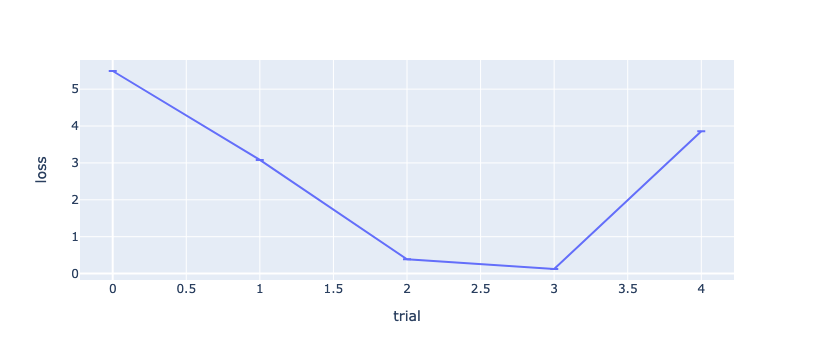

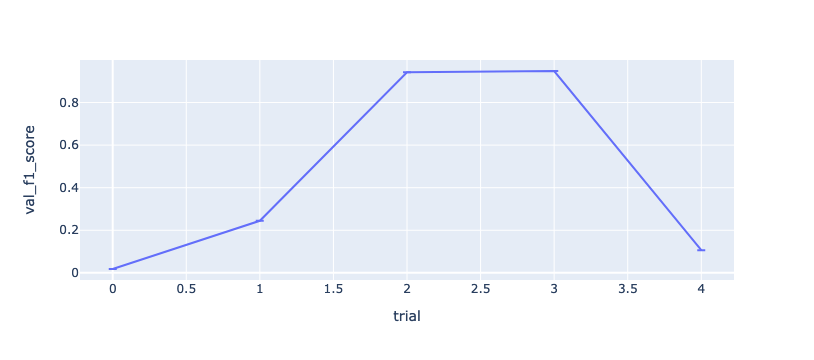

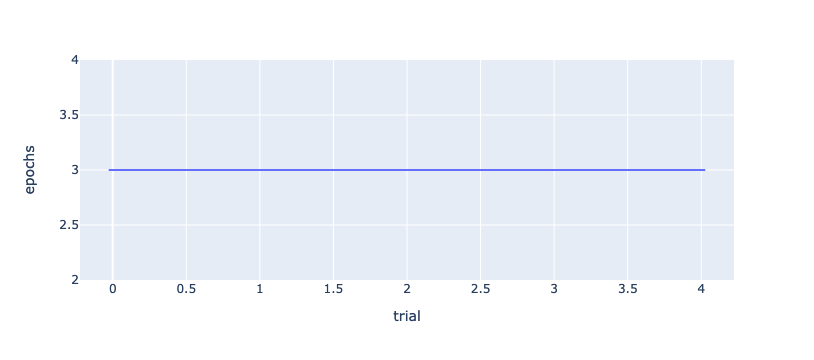

In [13]:
show_best_vals("../../../models/tuning/testfast2/")

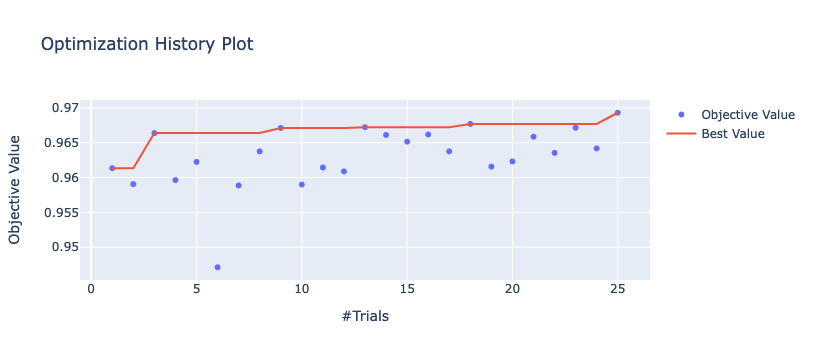

In [14]:
plot_optimization_history(study)

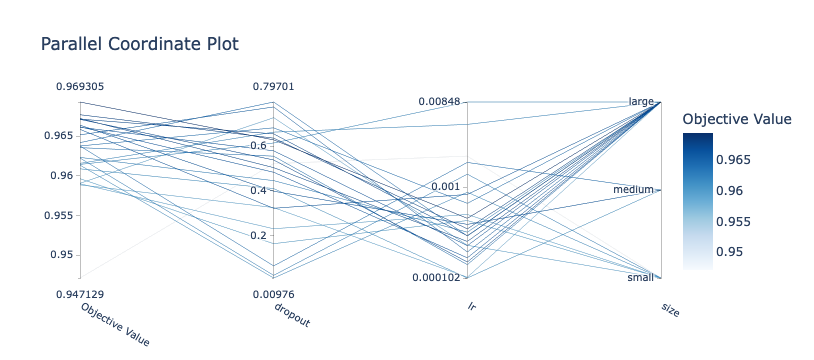

In [15]:
plot_parallel_coordinate(study)

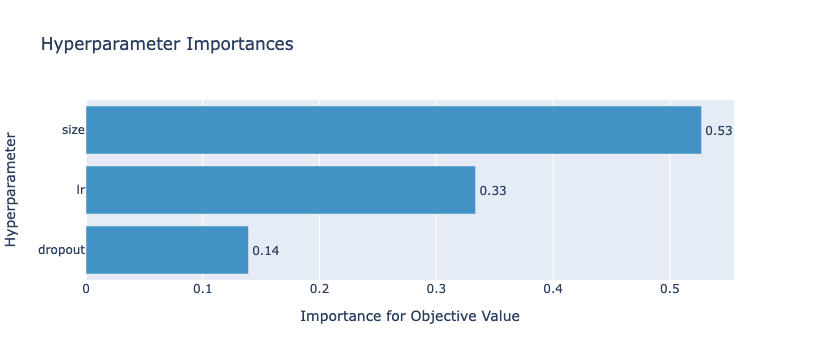

In [16]:
plot_param_importances(study)